In [48]:
# Loading the packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats

In [49]:
# Loading the data
data = pd.read_csv('data/drug_safety.csv')

- wbc: white blood cells
- rbc: red blood cells

In [50]:
# Exploring the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16103 entries, 0 to 16102
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              16103 non-null  int64  
 1   sex              16103 non-null  object 
 2   trx              16103 non-null  object 
 3   week             16103 non-null  int64  
 4   wbc              9128 non-null   float64
 5   rbc              9127 non-null   float64
 6   adverse_effects  16103 non-null  object 
 7   num_effects      16103 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 1006.6+ KB


In [51]:
data.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [52]:
print(data.trx.unique())
print(data.adverse_effects.unique())
print(data.num_effects.unique())

['Drug' 'Placebo']
['No' 'Yes']
[0 1 3 2]


In [80]:
# Handling NAs
data_rbc = data.rbc.dropna()
data_wbc = data.wbc.dropna()

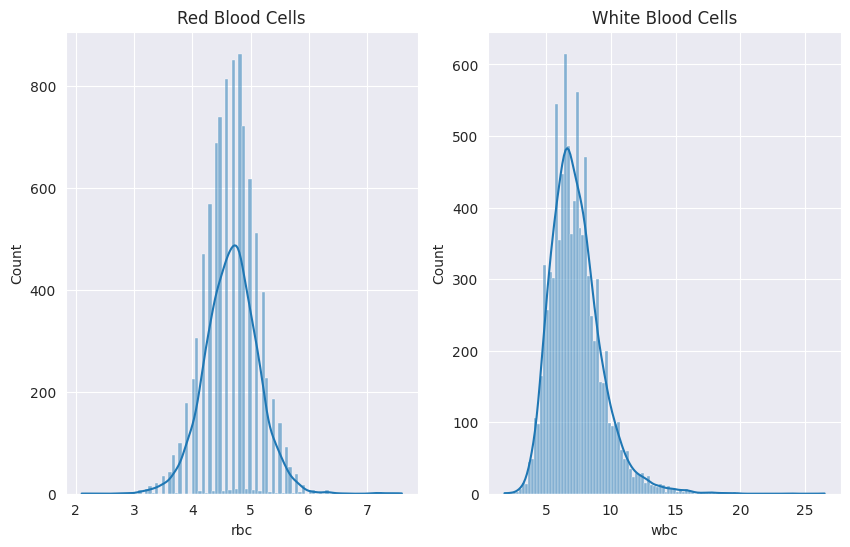

In [53]:
# Checking for Normality (visually)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.histplot(data=data.rbc, ax=ax[0], kde=True)
ax[0].set_title('Red Blood Cells')
sns.histplot(data=data.wbc, ax=ax[1], kde=True)
ax[1].set_title('White Blood Cells')
plt.show()


In [84]:
# Checking normality with Shapiro-Wilk
# White cells
shapiro_statistic, shapiro_p_value = stats.shapiro(data_wbc)
print(f"Shapiro-Wilk statistic: {shapiro_statistic:.3f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.3f}")

# White cells
shapiro_statistic, shapiro_p_value = stats.shapiro(data_rbc)
print(f"Shapiro-Wilk statistic: {shapiro_statistic:.3f}")
print(f"Shapiro-Wilk p-value: {shapiro_p_value:.3f}")


Shapiro-Wilk statistic: 0.937
Shapiro-Wilk p-value: 0.000
Shapiro-Wilk statistic: 0.985
Shapiro-Wilk p-value: 0.000


/home/carlos/Data/Training/ML/DrugSafety/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9128.
  res = hypotest_fun_out(*samples, **kwds)
/home/carlos/Data/Training/ML/DrugSafety/.venv/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9127.
  res = hypotest_fun_out(*samples, **kwds)


In [86]:
print(f'WBC mean: {data_wbc.mean()}')
print(f'RBC mean: {data_rbc.mean()}')

WBC mean: 7.340556537571209
RBC mean: 4.672784046011833


In [85]:
t_statistic, p_value = stats.ttest_ind(data_wbc, data_rbc)
print(t_statistic, p_value)

124.40900305812126 0.0


In [88]:
len(data_wbc)

9128